# Inspiration

We've included some open-ended questions that you can explore and try to address through creating R or Python analyses. Good luck and enjoy the learning!

* Is there any relationship between who a person works for and their performance score?
* What is the overall diversity profile of the organization?
* What are our best recruiting sources if we want to ensure a diverse organization?
* Can we predict who is going to terminate and who isn't? What level of accuracy can we achieve on this?
* Are there areas of the company where pay is not equitable?

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('HRDataset_v13.csv', sep=',')
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [5]:
# gerando um arquivo html contendo um relatório sobre a base para ter uma visão geral dos dados

import pandas_profiling

profile = data.profile_report(title='HR data Profiling Report')
profile.to_file(output_file="HR_data_report.html")

In [3]:
data['DOB'].head()

0    11/24/87
1    04/26/84
2    09/01/86
3    09/16/85
4    05/19/88
Name: DOB, dtype: object

In [4]:
from datetime import datetime
from datetime import date

In [5]:
# convertendo a coluna de data de nascimento do empregado em datetime
data['DOB'] = pd.to_datetime(data['DOB'])
data['DOB'].head()

0   1987-11-24
1   1984-04-26
2   1986-09-01
3   1985-09-16
4   1988-05-19
Name: DOB, dtype: datetime64[ns]

In [6]:
# criando uma função para extrair o ano de nascimento do empregado
def year(date):
    
    return date.year

In [7]:
# aplicando a função e criando uma coluna contendo os anos de nascimento
data['year'] = data['DOB'].apply(year)
data['year'].head()

0    1987.0
1    1984.0
2    1986.0
3    1985.0
4    1988.0
Name: year, dtype: float64

In [53]:
# visualizando as estatísticas da colua de ano de nascimento
data['year'].describe()

count     310.000000
mean     1994.367742
std        30.367228
min      1970.000000
25%      1978.000000
50%      1984.000000
75%      1988.000000
max      2069.000000
Name: year, dtype: float64

In [8]:
# como os anos estão no formato yy e não yyyy, durante a conversão datetime, anos que por exemplo eram '1964' foram convertidos em '2064', como se a pessoa tivesse nascido no futuro. isso precisa ser corrigido
def date_repair(date):
    
    if date > 2000:
        
        date = date - 100
        
    return date

In [9]:
# aplicando a função
data['year'] = data['year'].apply(date_repair)

In [56]:
# visualizando se o problema foi corrigido
data['year'].describe()

count     310.00000
mean     1978.56129
std         8.86839
min      1951.00000
25%      1973.00000
50%      1980.00000
75%      1986.00000
max      1992.00000
Name: year, dtype: float64

In [10]:
# criando uma função para calcular idade

def age_calculate(year):
    
    age = date.today().year - year
    
    return age

In [11]:
#criando uma coluna com as idades
data['age'] = data['year'].apply(age_calculate)
data['age'].head()

0    33.0
1    36.0
2    34.0
3    35.0
4    32.0
Name: age, dtype: float64

In [59]:
# visualizando as estatísticas da idade

data['age'].describe()

count    310.00000
mean      41.43871
std        8.86839
min       28.00000
25%       34.00000
50%       40.00000
75%       47.00000
max       69.00000
Name: age, dtype: float64

# Is there any relationship between who a person works for and their performance score?

In [11]:
# agrupando as performances e os managers para analisar a influência dos gerentes sobre as performances dos funcionários

manager_performance = pd.DataFrame(data.groupby(['PerformanceScore', 'ManagerID'])['ManagerID'].count().rename('count_manager'))
manager_performance.head()

count_manager
PerformanceScore ManagerID               
Exceeds          2.0                    4
                 4.0                    2
                 5.0                    2
                 6.0                    1
                 10.0                   2

In [12]:
# transformando os index do dataframe em colunas

manager_performance.reset_index(inplace=True)
manager_performance.head()

,PerformanceScore,ManagerID,count_manager
0,Exceeds,2.0,4
1,Exceeds,4.0,2
2,Exceeds,5.0,2
3,Exceeds,6.0,1
4,Exceeds,10.0,2


In [34]:
exceeds = manager_performance[manager_performance['PerformanceScore'] == 'Exceeds']
improvement = manager_performance[manager_performance['PerformanceScore'] == 'Needs Improvement']
fully = manager_performance[manager_performance['PerformanceScore'] == 'Fully Meets']
pip = manager_performance[manager_performance['PerformanceScore'] == 'PIP']

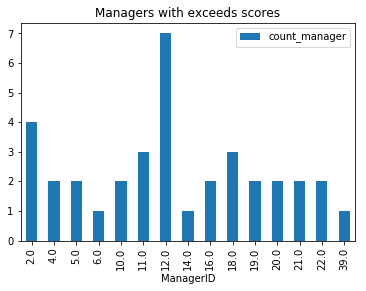

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
df_graph = exceeds[['ManagerID', 'count_manager']]
df_graph = df_graph.set_index('ManagerID')
plt.show(df_graph.plot.bar(), plt.title('Managers with exceeds scores'))

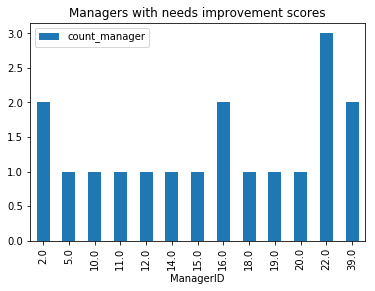

In [43]:
df_graph = improvement[['ManagerID', 'count_manager']]
df_graph = df_graph.set_index('ManagerID')
plt.show(df_graph.plot.bar(), plt.title('Managers with needs improvement scores'))

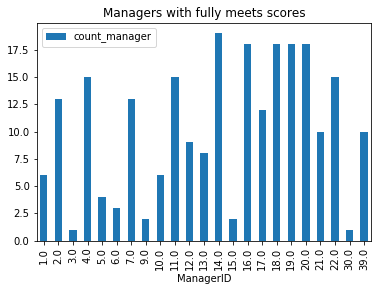

In [44]:
df_graph = fully[['ManagerID', 'count_manager']]
df_graph = df_graph.set_index('ManagerID')
plt.show(df_graph.plot.bar(), plt.title('Managers with fully meets scores'))

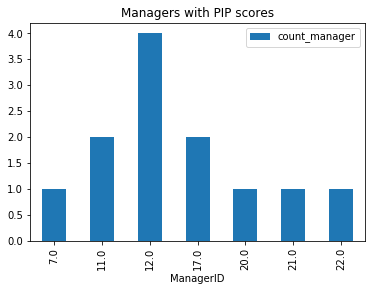

In [45]:
df_graph = pip[['ManagerID', 'count_manager']]
df_graph = df_graph.set_index('ManagerID')
plt.show(df_graph.plot.bar(), plt.title('Managers with PIP scores'))

In [13]:
# agrupando os managers pela média dos scoresID das pessoas que trabalharam para cada um 

data_managers = pd.DataFrame(data.groupby('ManagerID')['PerfScoreID'].mean().rename('mean_score'))
data_managers.head()

,mean_score
ManagerID,
1.0,3.000000
2.0,3.105263
3.0,3.000000
4.0,3.117647
5.0,3.142857


In [14]:
data_managers['mean_score'].describe()

count    23.000000
mean      2.984687
std       0.132287
min       2.666667
25%       2.913919
50%       3.000000
75%       3.069264
max       3.250000
Name: mean_score, dtype: float64

In [47]:
len(data_managers)

23

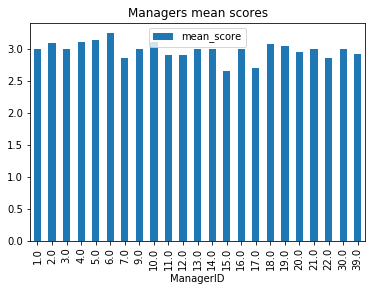

In [48]:
plt.show(data_managers.plot.bar(), plt.title('Managers mean scores'))

In [15]:
data_managers['general_score_mean'] = data['PerfScoreID'].mean()
data_managers.head()

,mean_score,general_score_mean
ManagerID,,
1.0,3.000000,2.983871
2.0,3.105263,2.983871
3.0,3.000000,2.983871
4.0,3.117647,2.983871
5.0,3.142857,2.983871


In [21]:
x = data_managers[data_managers['mean_score'] > data_managers['general_score_mean']].count()
y = data_managers[data_managers['mean_score'] < data_managers['general_score_mean']].count()

print(x, y)

mean_score            15
general_score_mean    15
dtype: int64 mean_score            8
general_score_mean    8
dtype: int64


In [ ]:
# a análise dos gráficos acima mostram que, em termos gerais, os resultados, quando agrupados por gerente, não apresentam grandes dispareidades, o que sugere que os gerentes não tenham tanta iinfluência assim

# podemos segmentar essa análise levando também em consideração o sexo da pessoa

In [22]:
# analisando a influencia dos gerentes quando os colaboradores são mulheres

fem = data[data['Sex'] == 'F']
df_fem = pd.DataFrame(fem.groupby('ManagerID')['PerfScoreID'].mean().rename('mean_score'))
df_fem.head()

,mean_score
ManagerID,
1.0,3.000000
2.0,3.333333
3.0,3.000000
4.0,3.111111
6.0,3.333333


In [23]:
df_fem['mean_score'].describe()

count    22.000000
mean      3.016202
std       0.163500
min       2.666667
25%       2.960526
50%       3.000000
75%       3.108333
max       3.333333
Name: mean_score, dtype: float64

In [38]:
masc = data[data['GenderID'] == 1]
df_masc = pd.DataFrame(masc.groupby('ManagerID')['PerfScoreID'].mean().rename('mean_score'))
df_masc.head()

,mean_score
ManagerID,
1.0,3.000000
2.0,2.900000
4.0,3.125000
5.0,3.142857
6.0,3.000000


In [39]:
df_masc['mean_score'].describe()

count    20.000000
mean      2.938750
std       0.327673
min       2.000000
25%       2.830357
50%       3.000000
75%       3.020833
max       3.666667
Name: mean_score, dtype: float64

In [40]:
# entre os homens a influência já se apresenta um pouco maior

In [35]:
# agrupando a satisfação do empregado e os managers para analisar a influência dos gerentes sobre a satisfação dos funcionários

manager_satisfaction = pd.DataFrame(data.groupby('ManagerID')['EmpSatisfaction'].mean().rename('mean_satisfaction'))
manager_satisfaction.head()

,mean_satisfaction
ManagerID,
1.0,3.500000
2.0,3.631579
3.0,4.000000
4.0,3.823529
5.0,4.285714


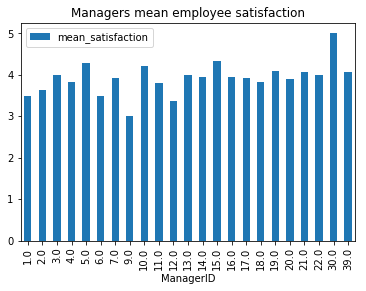

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.show(manager_satisfaction.plot.bar(), plt.title('Managers mean employee satisfaction'))

# Can we predict who is going to terminate and who isn't? What level of accuracy can we achieve on this?

In [12]:
df_terminations = data[['Termd', 'RecruitmentSource', 'GenderID', 'MaritalStatusID', 'PerfScoreID', 'SpecialProjectsCount', 'ManagerID', 'RaceDesc', 'PayRate', 'DateofTermination', 'year', 'EmpSatisfaction']]
df_terminations.head()

,Termd,RecruitmentSource,GenderID,MaritalStatusID,PerfScoreID,SpecialProjectsCount,ManagerID,RaceDesc,PayRate,DateofTermination,year,EmpSatisfaction
0,0.0,Diversity Job Fair,0.0,1.0,3.0,6.0,1.0,Black or African American,28.50,NaN,1987.0,2.0
1,0.0,Website Banner Ads,1.0,2.0,3.0,4.0,1.0,Black or African American,23.00,NaN,1984.0,4.0
2,0.0,Internet Search,1.0,0.0,3.0,5.0,1.0,White,29.00,NaN,1986.0,5.0
3,1.0,Pay Per Click - Google,0.0,1.0,3.0,4.0,1.0,White,21.50,04/15/15,1985.0,3.0
4,0.0,Website Banner Ads,0.0,0.0,3.0,5.0,1.0,White,16.56,NaN,1988.0,3.0


In [26]:
# criando uma variável representada pela idade da pessoa quando ela foi demitida

df_terminations['DateofTermination'] = pd.to_datetime(data['DateofTermination'])
data['DateofTermination'].head()

C:\Users\Luis Gustavo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0         NaN
1         NaN
2         NaN
3    04/15/15
4         NaN
Name: DateofTermination, dtype: object

In [27]:
# criando uma função para extrair o ano de nascimento do empregado
def year_termination(date):
    
    return date.year

In [28]:
# aplicando a função e criando uma coluna contendo os anos de demissão
df_terminations['year_termination'] = df_terminations['DateofTermination'].apply(year_termination)
df_terminations['year_termination'].head()

C:\Users\Luis Gustavo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0       NaN
1       NaN
2       NaN
3    2015.0
4       NaN
Name: year_termination, dtype: float64

In [29]:
# verificando se os anos gerados estão coerentes

df_terminations['year_termination'].describe()

count     103.000000
mean     2013.572816
std         1.729796
min      2010.000000
25%      2012.000000
50%      2014.000000
75%      2015.000000
max      2016.000000
Name: year_termination, dtype: float64

In [30]:
# criando uma função para calcular idade no ano de demissão

def age_termination(yot, yob):
    
    age = yot - yob
    
    return age

In [31]:
df_terminations['age_termination'] = df_terminations.apply(lambda x: age_termination(x['year_termination'], x['year']), axis=1)
df_terminations['age_termination'].head()

C:\Users\Luis Gustavo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0     NaN
1     NaN
2     NaN
3    30.0
4     NaN
Name: age_termination, dtype: float64

In [47]:
df_terminations = df_terminations.dropna(subset=['Termd'])
len(df_terminations)

310

In [19]:
# calculando oganho de informação de cada um dos atributos em relação à variável alvo (Termd)

# entropia na base:

import math

n = len(df_terminations['Termd'])
n0 = len(df_terminations[df_terminations['Termd'] == 0])
n1 = len(df_terminations[df_terminations['Termd'] == 1])

p0 = n0/n
p1 = n1/n

s = -(p0*math.log(p0, 2) + p1*math.log(p1, 2))

print(s)

0.9172168101057478


In [40]:
# calculando o GI de alguns atributos categóricos

colunas = ['RecruitmentSource', 'GenderID', 'MaritalStatusID', 'PerfScoreID', 'SpecialProjectsCount', 'ManagerID', 'RaceDesc', 'EmpSatisfaction']


GI = 0
GI_result = []
for col in colunas:
    df_inter = df_terminations
    df_inter = df_terminations.dropna(subset = [col])
    row_values = df_inter[col].unique()
    
    son_entropy = 0
    for unique in row_values:
        
        df = df_inter[df_inter[col]==unique]
        
        x = len(df)
        
        px = x/n
        
        l0 = len(df[df['Termd']==0])
        l1 = len(df[df['Termd']==1])
        
        c0 = l0/x
        c1 = l1/x
        
        if c0 == 1:
            
            c0 = 0.99999
            c1 = 0.00001
            
        if c0 == 0:
            
            c0 = 0.00001
            c1 = 0.99999
        
        son_entropy = son_entropy + (-(px*(c0*math.log(c0, 2) + c1*math.log(c1, 2))))
        
    GI = s - son_entropy
    
    #print('entropy by ', col, ' is ', son_entropy)
    print('GI by ', col, ' is ', GI)
        
        

GI by  RecruitmentSource  is  0.14367899097739922
GI by  GenderID  is  0.00019592224536602032
GI by  MaritalStatusID  is  0.03332598022372568
GI by  PerfScoreID  is  0.014400253878153135
GI by  SpecialProjectsCount  is  0.03403875199193618
GI by  ManagerID  is  0.19192720479204894
GI by  RaceDesc  is  0.009581271565663907
GI by  EmpSatisfaction  is  0.013497314974751595


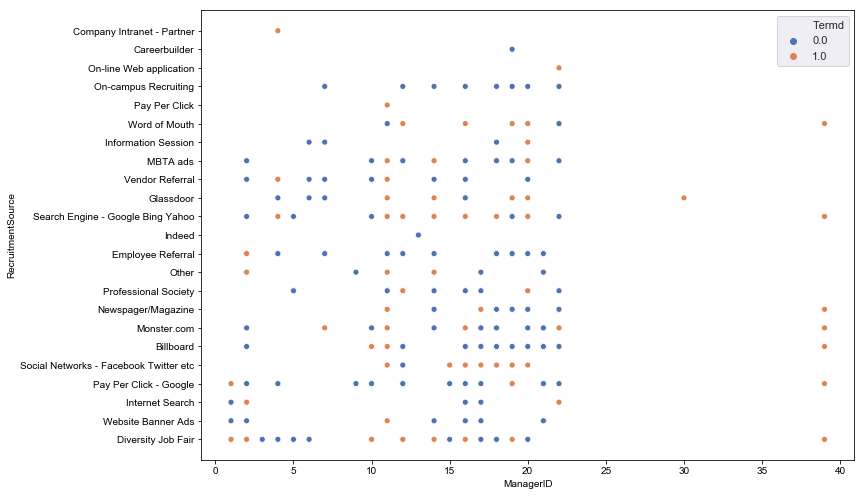

In [13]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

subdata = df_terminations[['RecruitmentSource', 'ManagerID', 'Termd']]
sns.set()
sns.scatterplot(ax=ax, x='ManagerID',y='RecruitmentSource',hue='Termd',data=subdata)

In [44]:
recruitment = df_terminations[df_terminations['Termd']==1]

recruitment = pd.DataFrame(recruitment.groupby('RecruitmentSource')['Termd'].count().rename('count_terminations'))
recruitment = recruitment.sort_values(by='count_terminations', ascending=False)
recruitment.head(25)

,count_terminations
RecruitmentSource,
Diversity Job Fair,16
Search Engine - Google Bing Yahoo,15
Monster.com,11
Social Networks - Facebook Twitter etc,8
Word of Mouth,7
Glassdoor,6
Newspager/Magazine,5
Billboard,5
MBTA ads,4


In [45]:
recruitment = df_terminations[df_terminations['Termd']==0]

recruitment = pd.DataFrame(recruitment.groupby('RecruitmentSource')['Termd'].count().rename('count_terminations'))
recruitment = recruitment.sort_values(by='count_terminations', ascending=False)
recruitment.head(25)

,count_terminations
RecruitmentSource,
Employee Referral,27
Professional Society,17
Pay Per Click - Google,17
Newspager/Magazine,13
Diversity Job Fair,13
MBTA ads,13
Monster.com,13
Website Banner Ads,12
On-campus Recruiting,11


In [20]:
df_terminations['age_termination'].describe()

count    103.000000
mean      36.233010
std       10.064696
min       22.000000
25%       29.000000
50%       34.000000
75%       42.000000
max       64.000000
Name: age_termination, dtype: float64

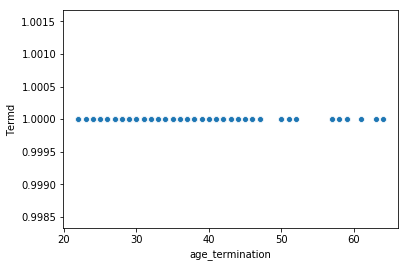

In [23]:
%matplotlib inline
import seaborn as sns

sns.scatterplot(x='age_termination',y='Termd',data=df_terminations)

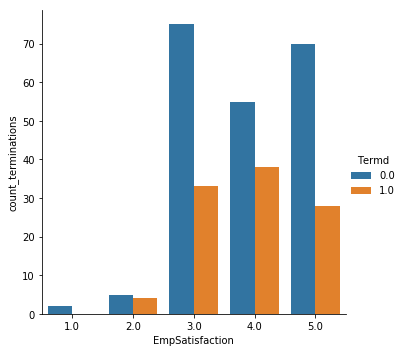

In [49]:
# analisando graficamente as demissões por satisfação

sats_terminations = pd.DataFrame(df_terminations.groupby(['EmpSatisfaction', 'Termd'])['Termd'].count().rename('count_terminations'))
sats_terminations.reset_index(inplace=True)

sns.catplot(x="EmpSatisfaction",y="count_terminations",kind='bar',hue='Termd',data=sats_terminations)

In [24]:
df_terminations = df_terminations.dropna(subset=['DateofTermination'])
len(df_terminations)

103

In [24]:
# agrupando as demissões por idade

age_term = pd.DataFrame(df_terminations.groupby('age_termination')['age_termination'].count().rename('count_age_termination'))
age_term.head()

,count_age_termination
age_termination,
22.0,3
23.0,1
24.0,4
25.0,5
26.0,3


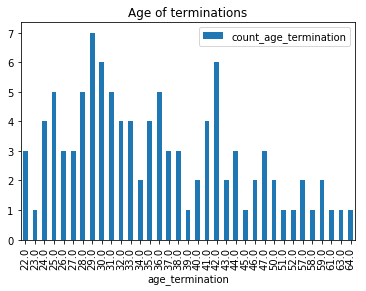

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.show(age_term.plot.bar(), plt.title('Age of terminations'))

In [26]:
# agrupando as demissões por gênero

gender_term = pd.DataFrame(df_terminations.groupby('GenderID')['GenderID'].count().rename('count_gender_termination'))
gender_term.head()

,count_gender_termination
GenderID,
0.0,60
1.0,43


In [27]:
# agrupando as demissões por raça

race_term = pd.DataFrame(df_terminations.groupby('RaceDesc')['RaceDesc'].count().rename('count_race_termination'))
race_term.head()

,count_race_termination
RaceDesc,
Asian,11
Black or African American,17
Hispanic,1
Two or more races,7
White,67


In [28]:
# análise: fazer uma comparação entre o total de indivíduos de uma raça e o total que foi demitido dessa mesma raça

race = pd.DataFrame(data.groupby('RaceDesc')['RaceDesc'].count().rename('count_race'))
race.head()

,count_race
RaceDesc,
American Indian or Alaska Native,4
Asian,34
Black or African American,57
Hispanic,4
Two or more races,18


In [29]:
data_joined = pd.merge(race_term, race, on='RaceDesc')
data_joined.head()

,count_race_termination,count_race
RaceDesc,,
Asian,11,34
Black or African American,17,57
Hispanic,1,4
Two or more races,7,18
White,67,193


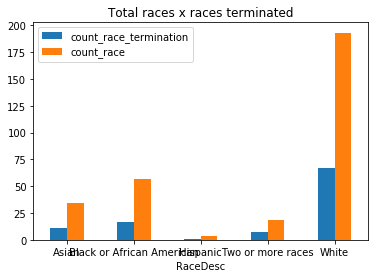

In [31]:
plt.show(data_joined.plot.bar(rot=0), plt.title('Total races x races terminated'))

In [50]:
# analisar as demissões por Payrate

# What are our best recruiting sources if we want to ensure a diverse organization?

In [12]:
row_values = data['RecruitmentSource'].unique()
x = len(row_values)
print(x)

24


In [13]:
recruitment = pd.DataFrame(data.groupby('RecruitmentSource')['RecruitmentSource'].count().rename('count_sources'))
recruitment = recruitment.sort_values(by='count_sources', ascending=False)
recruitment.head(25)

,count_sources
RecruitmentSource,
Employee Referral,31
Diversity Job Fair,29
Search Engine - Google Bing Yahoo,25
Monster.com,24
Pay Per Click - Google,21
Professional Society,20
Newspager/Magazine,18
MBTA ads,17
Billboard,16


In [14]:
# a análise será realizada apenas entre os 6 recursos mais usados

sources = ['Employee Referral',
'Diversity Job Fair',
'Search Engine - Google Bing Yahoo',
'Monster.com',
'Pay Per Click - Google',
'Professional Society']

In [23]:
subdata = data[['RecruitmentSource', 'GenderID', 'HispanicLatino', 'RaceDesc', 'age']]
subdata.head()

,RecruitmentSource,GenderID,HispanicLatino,RaceDesc,age
0,Diversity Job Fair,0.0,No,Black or African American,33.0
1,Website Banner Ads,1.0,No,Black or African American,36.0
2,Internet Search,1.0,No,White,34.0
3,Pay Per Click - Google,0.0,No,White,35.0
4,Website Banner Ads,0.0,No,White,32.0


In [17]:
# analisando employee referral
%matplotlib inline
import matplotlib.pyplot as plt

divesrsity = subdata[subdata['RecruitmentSource']==sources[0]]

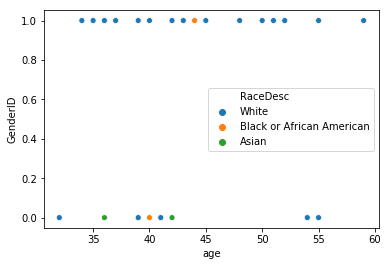

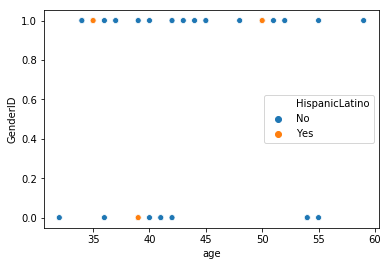

In [20]:
import seaborn as sns

sns.scatterplot(x='age',y='GenderID',hue='RaceDesc',data=diversity)
plt.show()

sns.scatterplot(x='age',y='GenderID',hue='HispanicLatino',data=diversity)
plt.show()

In [24]:
# analisando Diversity Job Fair

diversity = subdata[subdata['RecruitmentSource']==sources[1]]

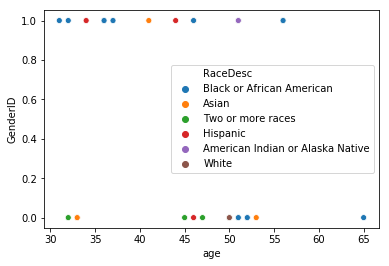

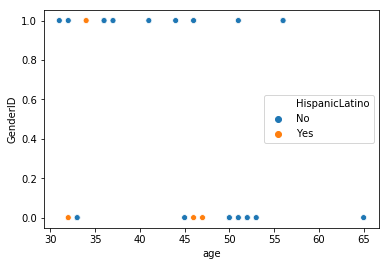

In [25]:
sns.scatterplot(x='age',y='GenderID',hue='RaceDesc',data=diversity)
plt.show()

sns.scatterplot(x='age',y='GenderID',hue='HispanicLatino',data=diversity)
plt.show()

In [26]:
# analisando Search Engine - Google Bing Yahoo

diversity = subdata[subdata['RecruitmentSource']==sources[2]]

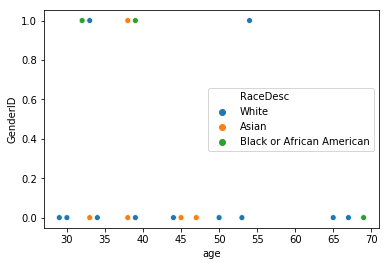

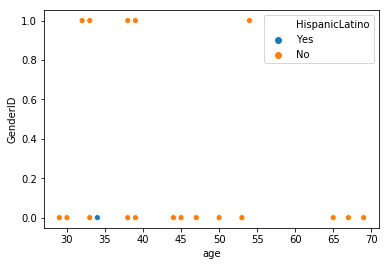

In [27]:
sns.scatterplot(x='age',y='GenderID',hue='RaceDesc',data=diversity)
plt.show()

sns.scatterplot(x='age',y='GenderID',hue='HispanicLatino',data=diversity)
plt.show()

In [28]:
# analisando Monster.com

diversity = subdata[subdata['RecruitmentSource']==sources[3]]

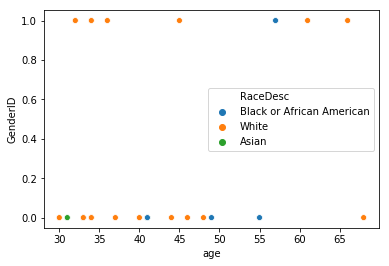

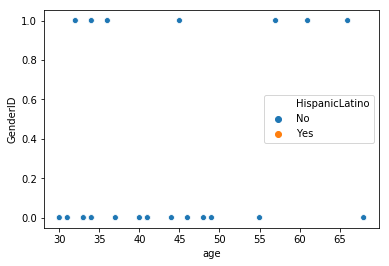

In [29]:
sns.scatterplot(x='age',y='GenderID',hue='RaceDesc',data=diversity)
plt.show()

sns.scatterplot(x='age',y='GenderID',hue='HispanicLatino',data=diversity)
plt.show()

In [30]:
# analisando Pay Per Click - Google

diversity = subdata[subdata['RecruitmentSource']==sources[4]]

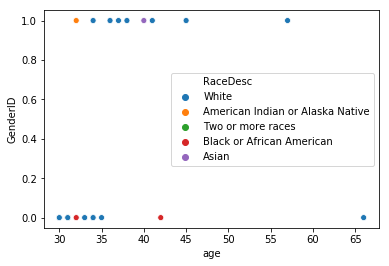

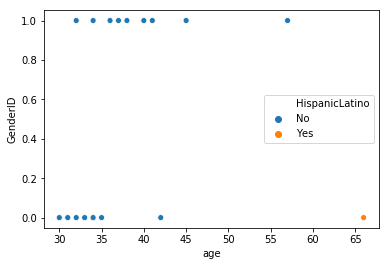

In [31]:
sns.scatterplot(x='age',y='GenderID',hue='RaceDesc',data=diversity)
plt.show()

sns.scatterplot(x='age',y='GenderID',hue='HispanicLatino',data=diversity)
plt.show()

# Are there areas of the company where pay is not equitable?

In [14]:
df_pay = data[['PayRate', 'Department', 'ManagerID', 'PerformanceScore', 'GenderID', 'EmpSatisfaction', 'RaceDesc', 'age']]
df_pay.head()

,PayRate,Department,ManagerID,PerformanceScore,GenderID,EmpSatisfaction,RaceDesc,age
0,28.50,Admin Offices,1.0,Fully Meets,0.0,2.0,Black or African American,33.0
1,23.00,Admin Offices,1.0,Fully Meets,1.0,4.0,Black or African American,36.0
2,29.00,Admin Offices,1.0,Fully Meets,1.0,5.0,White,34.0
3,21.50,Admin Offices,1.0,Fully Meets,0.0,3.0,White,35.0
4,16.56,Admin Offices,1.0,Fully Meets,0.0,3.0,White,32.0


In [17]:
race = pd.DataFrame(df_pay.groupby(['Department', 'RaceDesc'])['PayRate'].mean().rename('mean_PayRate'))
race.head()

mean_PayRate
Department       RaceDesc                               
Admin Offices    Asian                         27.725000
                 Black or African American     35.500000
                 White                         31.402000
Executive Office White                         80.000000
IT/IS            Asian                         49.321429

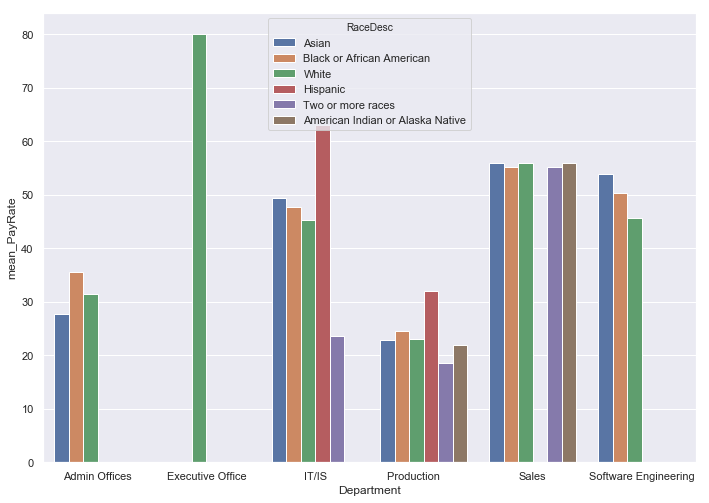

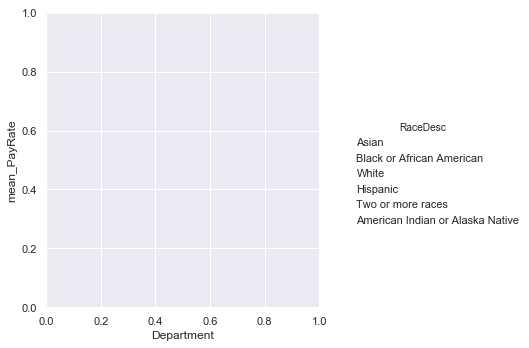

In [39]:
import matplotlib.pyplot as plt
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.catplot(ax=ax, x="Department",y="mean_PayRate",kind='bar',hue='RaceDesc', data=race)

In [16]:
gender = pd.DataFrame(df_pay.groupby(['Department', 'GenderID'])['PayRate'].mean().rename('mean_PayRate'))
gender.head()

mean_PayRate
Department       GenderID              
Admin Offices    0.0          26.160000
                 1.0          40.500000
Executive Office 0.0          80.000000
IT/IS            0.0          43.565455
                 1.0          47.537143

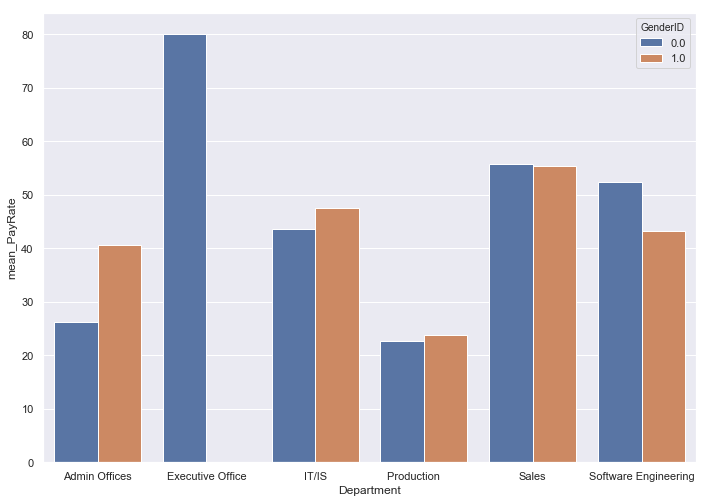

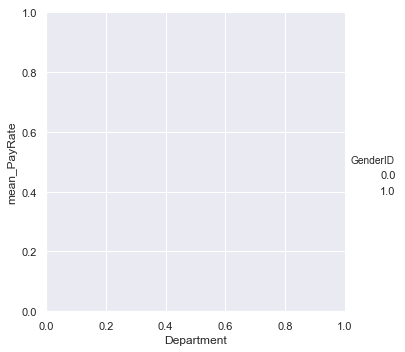

In [18]:
gender.reset_index(inplace=True)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.catplot(ax=ax, x="Department",y="mean_PayRate",kind='bar',hue='GenderID', data=gender)

In [19]:
performance = pd.DataFrame(df_pay.groupby(['Department', 'PerformanceScore'])['PayRate'].mean().rename('mean_PayRate'))
performance.head()

mean_PayRate
Department       PerformanceScore               
Admin Offices    Fully Meets           31.896000
Executive Office Fully Meets           80.000000
IT/IS            Exceeds               49.708333
                 Fully Meets           44.886429
                 Needs Improvement     63.000000

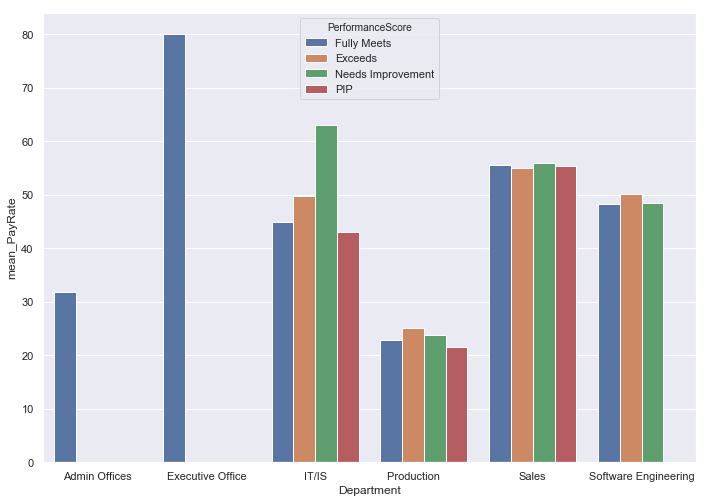

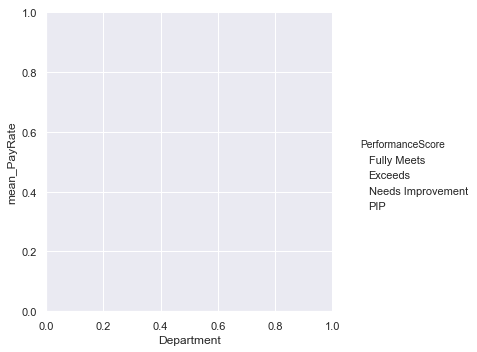

In [20]:
performance.reset_index(inplace=True)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.catplot(ax=ax, x="Department",y="mean_PayRate",kind='bar',hue='PerformanceScore', data=performance)

In [21]:
satisfaction = pd.DataFrame(df_pay.groupby(['Department', 'EmpSatisfaction'])['PayRate'].mean().rename('mean_PayRate'))
satisfaction.head()

mean_PayRate
Department       EmpSatisfaction              
Admin Offices    2.0                 28.500000
                 3.0                 24.336667
                 4.0                 37.690000
                 5.0                 29.000000
Executive Office 3.0                 80.000000

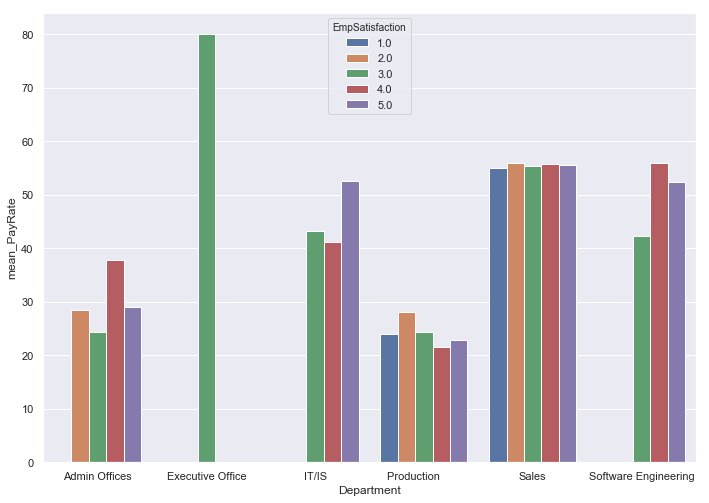

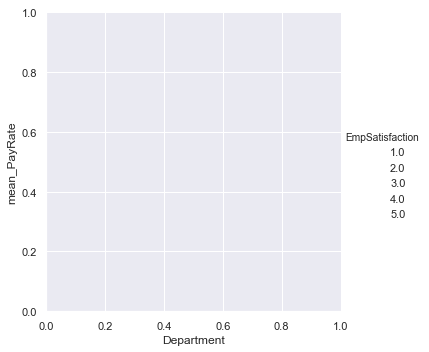

In [22]:
satisfaction.reset_index(inplace=True)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.catplot(ax=ax, x="Department",y="mean_PayRate",kind='bar',hue='EmpSatisfaction', data=satisfaction)